In [2]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf

from statsmodels.tools.eval_measures import rmse

In [3]:
#주피터 노트북 내 그래프를 바로 그리기 위한 설정
%matplotlib inline
#한글 폰트 (맑은 고딕) 적용
matplotlib.rc('font',family='Malgun Gothic')

matplotlib.rc('axes',unicode_minus=False)

In [4]:
df_raw = pd.read_csv("D:/data/1/부품수리시간.csv")
df_raw.head()

,UNITS,MINUTES
0,1,23
1,2,29
2,3,49
3,4,64
4,4,74


In [5]:
df_raw.describe().round(3)

,UNITS,MINUTES
count,14.000,14.000
mean,6.000,97.214
std,2.961,46.217
min,1.000,23.000
25%,4.000,66.500
50%,6.000,96.500
75%,8.750,138.500
max,10.000,166.000


<AxesSubplot:xlabel='UNITS', ylabel='MINUTES'>

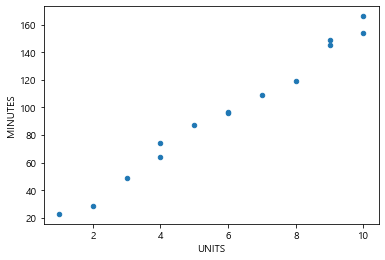

In [6]:
df_raw.plot.scatter( x= 'UNITS', y = 'MINUTES')


In [7]:
df_raw.corr(method = 'pearson').round(3)

,UNITS,MINUTES
UNITS,1.000,0.994
MINUTES,0.994,1.000


In [8]:
reg_model = smf.ols(formula = "MINUTES ~ UNITS", data = df_raw)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                MINUTES   R-squared:                       0.987
Model:                            OLS   Adj. R-squared:                  0.986
Method:                 Least Squares   F-statistic:                     943.2
Date:                Fri, 12 Aug 2022   Prob (F-statistic):           8.92e-13
Time:                        22:12:11   Log-Likelihood:                -42.374
No. Observations:                  14   AIC:                             88.75
Df Residuals:                      12   BIC:                             90.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.1617      3.355      1.240      0.2

c:\dev\Python310\lib\site-packages\scipy\stats\_stats_py.py:1769: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=14
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


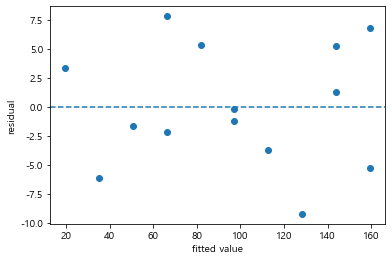

In [9]:
plt.scatter(reg_result.fittedvalues,reg_result.resid)
plt.xlabel("fitted value"); plt.ylabel('residual')
plt.axhline( y = 0, linestyle = '--')


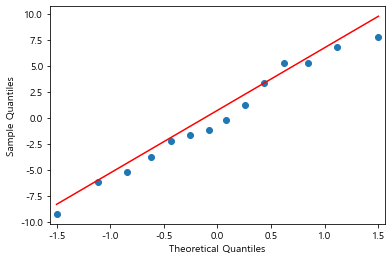

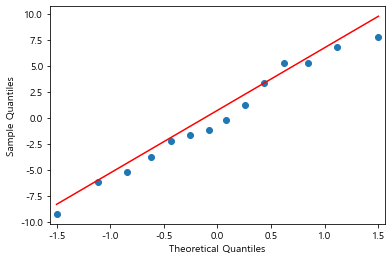

In [10]:
qqplot(reg_result.resid,line = 'q')

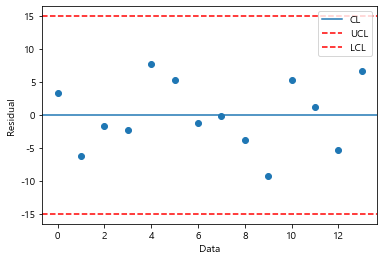

In [11]:
plt.scatter(df_raw.index, reg_result.resid, marker ='o')
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline( y =0, linestyle ='-', label= 'CL')
plt.axhline(y = 3*np.std(reg_result.resid),linestyle ='--', color ='red', label = 'UCL')
plt.axhline(y = -3*np.std(reg_result.resid),linestyle ='dashed', color ='red', label = 'LCL')
plt.legend(); plt.show()

In [13]:
reg_result.predict({"UNITS": 12})

0    190.266917
dtype: float64

In [ ]:
import pandas as pd 
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf


from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from statsmodels.tools.eval_measures import rmse

from sklearn.metrics import r2_score

In [ ]:
# 다주선형 회귀분석 

df_raw = pd.read_csv("D:/data/2/체질검사.csv")
df_raw.head()

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
0,35.2,46,363.15,72.25,51.2,136.2,148.1,147.7,87.3,49.1,29.6,45.0,29.0,21.4
1,11.8,27,168.00,71.25,38.1,93.0,79.1,94.5,57.3,36.2,24.5,29.0,30.0,18.8
2,22.2,69,177.75,68.50,38.7,102.0,95.0,98.3,55.0,38.3,21.8,30.8,25.7,18.8
3,10.6,57,147.75,65.75,35.2,99.6,86.4,90.1,53.0,35.0,21.3,31.7,27.3,16.9
4,47.5,51,219.00,64.00,41.2,119.8,122.1,112.8,62.5,36.9,23.6,34.7,29.1,18.4


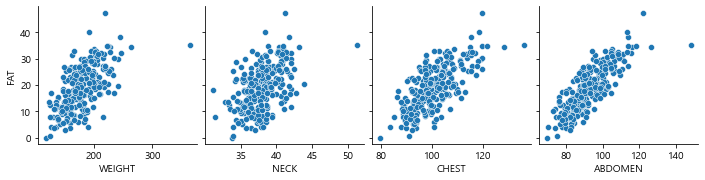

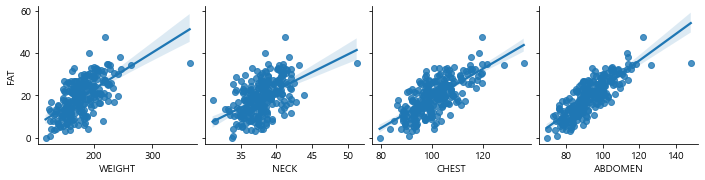

In [ ]:
sns.pairplot(df_raw,y_vars='FAT', x_vars = ['WEIGHT','NECK',"CHEST","ABDOMEN"])

sns.pairplot(df_raw, y_vars = 'FAT', x_vars = ["WEIGHT","NECK","CHEST","ABDOMEN"],kind ="reg")

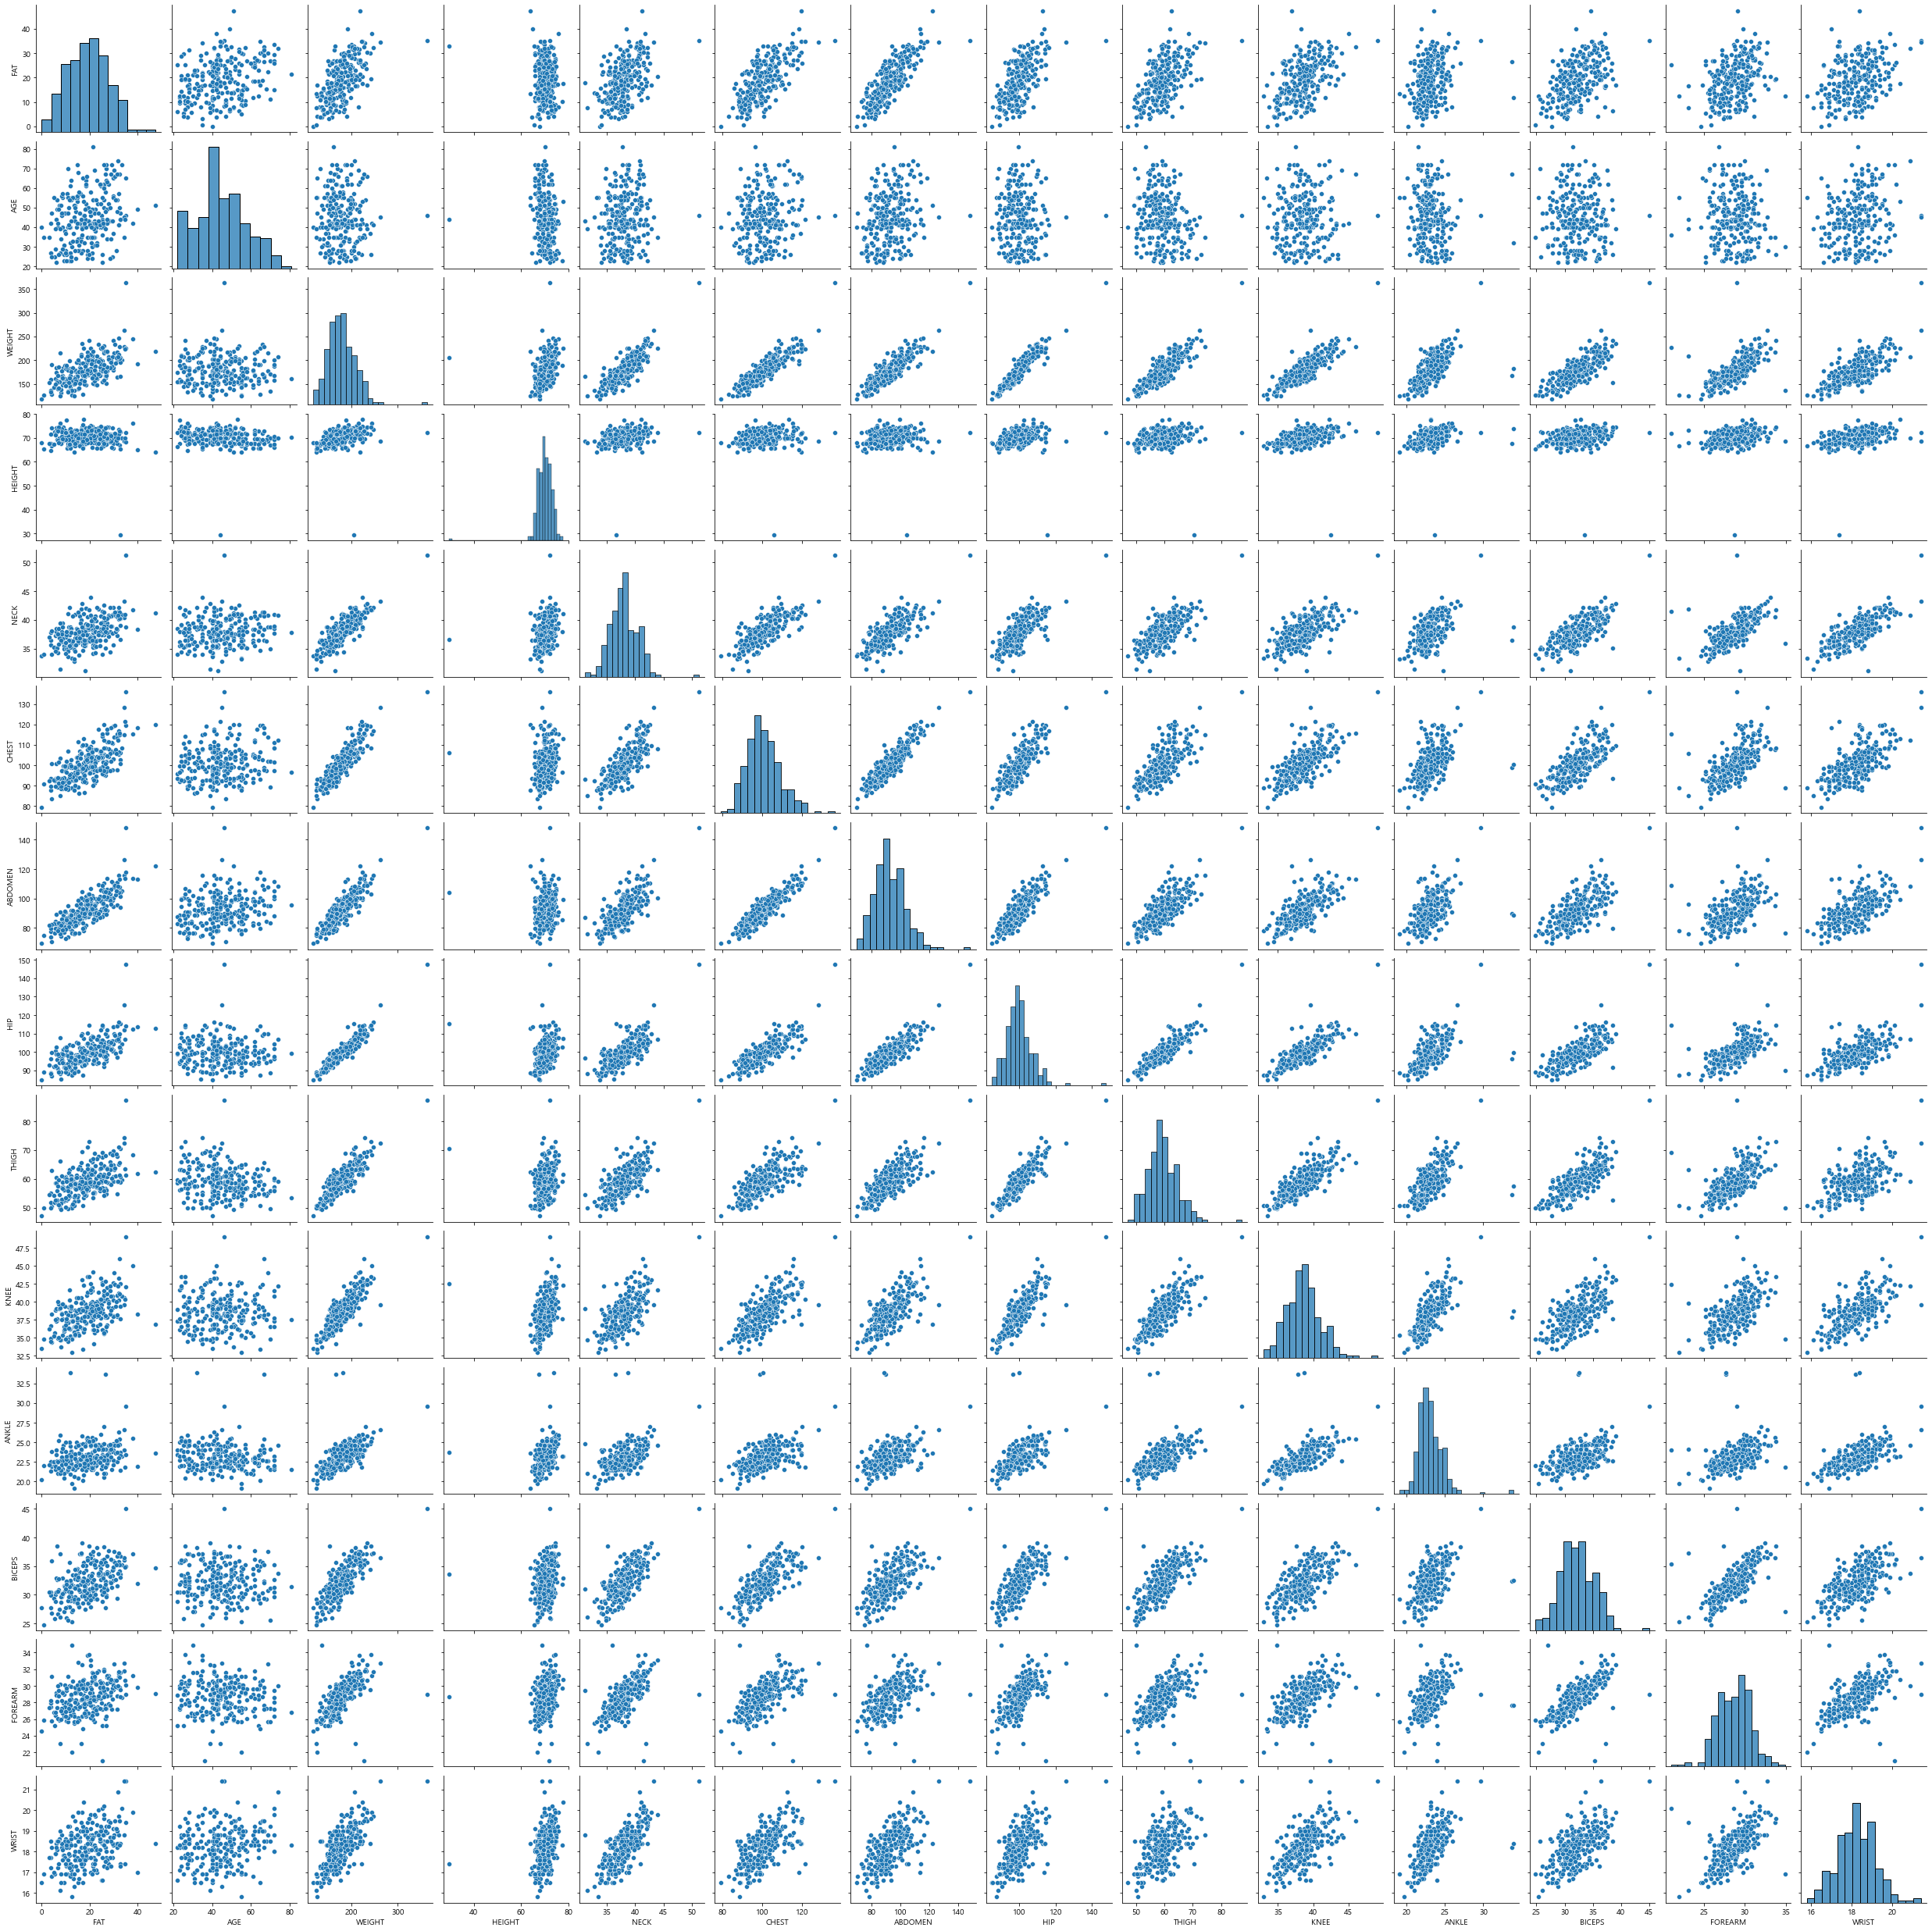

In [ ]:
sns.pairplot(df_raw)

In [ ]:
df_raw.corr().round(3)

,FAT,AGE,WEIGHT,HEIGHT,NECK,CHEST,ABDOMEN,HIP,THIGH,KNEE,ANKLE,BICEPS,FOREARM,WRIST
FAT,1.000,0.291,0.612,-0.089,0.491,0.703,0.813,0.625,0.560,0.509,0.266,0.493,0.361,0.347
AGE,0.291,1.000,-0.013,-0.172,0.114,0.176,0.230,-0.050,-0.200,0.018,-0.105,-0.041,-0.085,0.214
WEIGHT,0.612,-0.013,1.000,0.308,0.831,0.894,0.888,0.941,0.869,0.853,0.614,0.800,0.630,0.730
HEIGHT,-0.089,-0.172,0.308,1.000,0.254,0.135,0.088,0.170,0.148,0.286,0.265,0.208,0.229,0.322
NECK,0.491,0.114,0.831,0.254,1.000,0.785,0.754,0.735,0.696,0.672,0.478,0.731,0.624,0.745
CHEST,0.703,0.176,0.894,0.135,0.785,1.000,0.916,0.829,0.730,0.719,0.483,0.728,0.580,0.660
ABDOMEN,0.813,0.230,0.888,0.088,0.754,0.916,1.000,0.874,0.767,0.737,0.453,0.685,0.503,0.620
HIP,0.625,-0.050,0.941,0.170,0.735,0.829,0.874,1.000,0.896,0.823,0.558,0.739,0.545,0.630
THIGH,0.560,-0.200,0.869,0.148,0.696,0.730,0.767,0.896,1.000,0.799,0.540,0.761,0.567,0.559
KNEE,0.509,0.018,0.853,0.286,0.672,0.719,0.737,0.823,0.799,1.000,0.612,0.679,0.556,0.665


In [ ]:
df_train, df_test = train_test_split(df_raw,test_size=0.3,random_state =1234)
print('train data size: {}'.format(df_train.shape))
print('train data size: {}'.format(df_test.shape))

train data size: (176, 14)
train data size: (76, 14)


In [ ]:
reg_model = smf.ols(formula ='FAT ~ AGE +WEIGHT + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
    KNEE + ANKLE + BICEPS + FOREARM + WRIST', data = df_train)

In [ ]:
# 적합
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     41.45
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           9.76e-45
Time:                        22:00:02   Log-Likelihood:                -495.19
No. Observations:                 176   AIC:                             1018.
Df Residuals:                     162   BIC:                             1063.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -35.8408     20.905     -1.714      0.0

In [ ]:
df_train_x = df_train.drop('FAT', axis = 1)

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) \
    for i in range(df_train_x_const.shape[1])]

# vif정렬
df_vif.sort_values('VIF',ascending = True).round(2)

,variable,VIF
3,HEIGHT,1.65
12,FOREARM,2.03
10,ANKLE,2.23
1,AGE,2.42
11,BICEPS,3.45
13,WRIST,3.50
4,NECK,4.25
9,KNEE,5.13
8,THIGH,8.96
5,CHEST,10.72


In [ ]:
reg_model = smf.ols(formula = 'FAT ~ AGE + HEIGHT + NECK + CHEST + ABDOMEN + HIP + THIGH + \
    KNEE + ANKLE + BICEPS + FOREARM + WRIST', data = df_train)

reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.763
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     43.77
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           9.84e-45
Time:                        22:00:02   Log-Likelihood:                -497.32
No. Observations:                 176   AIC:                             1021.
Df Residuals:                     163   BIC:                             1062.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2082      8.590      0.257      0.7

In [ ]:
df_train_x = df_train.drop(['FAT','WEIGHT'],axis =1)

df_train_x_const = add_constant(df_train_x)

df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i)\
    for i in range(df_train_x_const.shape[1])]

df_vif.sort_values('VIF',ascending = True).round(2)





,variable,VIF
2,HEIGHT,1.36
11,FOREARM,2.03
9,ANKLE,2.10
1,AGE,2.33
10,BICEPS,3.37
12,WRIST,3.40
3,NECK,3.77
8,KNEE,4.64
4,CHEST,8.80
7,THIGH,8.94


In [ ]:
reg_model = smf.ols(formula = 'FAT ~ HEIGHT + NECK + ABDOMEN + HIP + FOREARM', data = df_train)
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.743
Method:                 Least Squares   F-statistic:                     102.3
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           2.18e-49
Time:                        22:00:02   Log-Likelihood:                -501.89
No. Observations:                 176   AIC:                             1016.
Df Residuals:                     170   BIC:                             1035.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.7817      7.302      0.381      0.7

In [ ]:
# 다중공산성 재확인
df_train_x = df_train[['HEIGHT','NECK','ABDOMEN','HIP','FOREARM']]

# 상수항 추가함수 적용
df_train_x_const = add_constant(df_train_x)

# df로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_train_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_train_x_const.values, i) \
    for i in range(df_train_x_const.shape[1])]

# vif 정렬
df_vif.sort_values('VIF',ascending = True).round(2)

,variable,VIF
1,HEIGHT,1.14
5,FOREARM,1.57
2,NECK,2.87
3,ABDOMEN,4.91
4,HIP,4.95
0,const,516.31


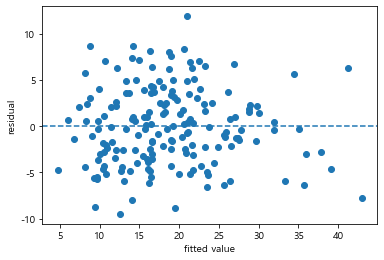

In [ ]:
plt.scatter(reg_result.fittedvalues, reg_result.resid)
plt.xlabel('fitted value')
plt.ylabel('residual')
plt.axhline( y = 0, linestyle = '--')

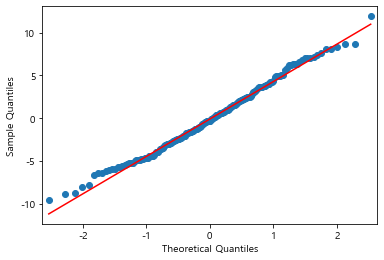

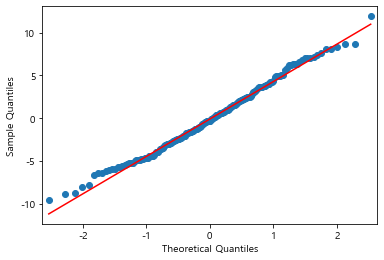

In [ ]:
qqplot(reg_result.resid, line = 'q')

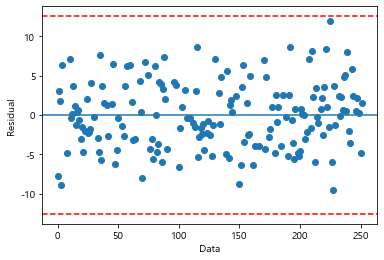

In [ ]:
plt.scatter(df_train.index, reg_result.resid)
plt.xlabel('Data') ; plt.ylabel('Residual')
plt.axhline(y=0, linestyle = '-',label ='CL')
plt.axhline(y = 3*np.std(reg_result.resid),linestyle ='--', color ='red', label = 'UCL')
plt.axhline(y = -3*np.std(reg_result.resid),linestyle ='dashed', color ='red', label = 'LCL')

In [ ]:
# 모델의 성능
train_pred = reg_result.predict(df_train)
test_pred = reg_result.predict(df_test)
print('train data의 결정계수:' , r2_score(df_train['FAT'], train_pred))
print('test data의 결정계수:', r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.7505481797941164
test data의 결정계수: 0.6575253938890118


In [ ]:
# backward elimination selection
# RFE : 입력된 모델을 이용하여 변수 중요도가 낮은 순으로 순차적으로 제거

# 목표변수/ 설명변수 분리
df_train_y = df_train['FAT']
df_train_x = df_train.drop('FAT', axis=1)

# sklearn의 선형회귀 모델
model = LinearRegression()

#전체 변수 중 5개의 변수가 남을 때까지 변수 선택
rfe = RFE(estimator=model, n_features_to_select=5).fit(df_train_x, df_train_y)

# 선택된 변수
selected_cols = df_train_x.columns[rfe.support_]

# 제거된 변수
removed_cols = df_train_x.columns[~rfe.support_]

print('Selected variables:{}'.format(selected_cols))
print('Removed variables:{}'.format(removed_cols))

Selected variables:Index(['NECK', 'ABDOMEN', 'ANKLE', 'FOREARM', 'WRIST'], dtype='object')
Removed variables:Index(['AGE', 'WEIGHT', 'HEIGHT', 'CHEST', 'HIP', 'THIGH', 'KNEE', 'BICEPS'], dtype='object')


In [ ]:
#회귀 모델 생성 
rfe_reg_model = smf.ols(formula = 'FAT ~ NECK + ABDOMEN + ANKLE + FOREARM + WRIST', data = df_train)
#적합 
rfe_reg_result = rfe_reg_model.fit()
print(rfe_reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                    FAT   R-squared:                       0.724
Model:                            OLS   Adj. R-squared:                  0.716
Method:                 Least Squares   F-statistic:                     89.26
Date:                Mon, 08 Aug 2022   Prob (F-statistic):           1.07e-45
Time:                        22:00:02   Log-Likelihood:                -510.73
No. Observations:                 176   AIC:                             1033.
Df Residuals:                     170   BIC:                             1052.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.3447      6.993     -1.336      0.1

In [ ]:
# 후진제거법 다중공산성 확인
df_train_x_rfe = df_train_x[selected_cols]

# 상수항 추가함수 적용
df_train_x_rfe_const = add_constant(df_train_x)

# df로 저장
df_rfe_vif = pd.DataFrame()
df_rfe_vif['Variable'] = df_train_x_rfe_const.columns
df_rfe_vif["VIF"] = [variance_inflation_factor(df_train_x_rfe_const.values,i)
               for i in range(df_train_x_rfe_const.shape[1])]

# vif 정렬
df_rfe_vif.sort_values("VIF",ascending=True).round(2)

,Variable,VIF
3,HEIGHT,1.65
12,FOREARM,2.03
10,ANKLE,2.23
1,AGE,2.42
11,BICEPS,3.45
13,WRIST,3.50
4,NECK,4.25
9,KNEE,5.13
8,THIGH,8.96
5,CHEST,10.72


In [ ]:
# 평가용 데이터에 대한 성능 확인 
train_pred = rfe_reg_result.predict(df_train)
test_pred = rfe_reg_result.predict(df_test)
print('train data의 결정계수:' , r2_score(df_train['FAT'], train_pred))
print('test data의 결정계수:', r2_score(df_test['FAT'], test_pred))

train data의 결정계수: 0.724168518676446
test data의 결정계수: 0.6769741931968403


<AxesSubplot:>

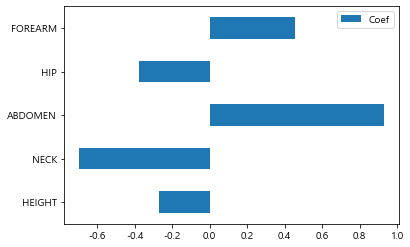

In [ ]:
df_reg_coef = pd.DataFrame({'Coef':reg_result.params.values[1:]},
                            index = ['HEIGHT', 'NECK',"ABDOMEN",'HIP','FOREARM'])
df_reg_coef.plot.barh(y = 'Coef')


In [ ]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [ ]:
## 
df_raw_y = df_raw['FAT']
df_raw_x = df_raw.drop('FAT',axis=1, inplace = False)

df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state = 1234)

In [ ]:
print('train data X size : {}'.format(df_train_x.shape))
print('train data Y size : {}'.format(df_train_y.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data Y size : {}'.format(df_test_y.shape))

train data X size : (176, 13)
train data Y size : (176,)
test data X size : (76, 13)
test data Y size : (76,)


-36.013578912686654


<AxesSubplot:>

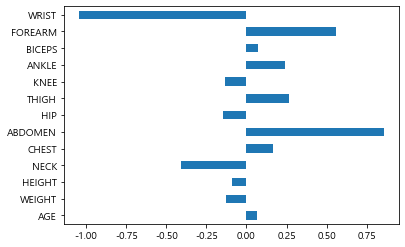

In [ ]:
ridge = Ridge(random_state = 1234, alpha = 1)
ridge.fit(df_train_x, df_train_y)

print(ridge.intercept_)

df_ridge_coef = pd.DataFrame({'Coef': ridge.coef_}, index = df_train_x.columns)

df_ridge_coef.plot.barh(y= 'Coef', legend = False)

In [ ]:
train_pred = ridge.predict(df_train_x)
test_pred = ridge.predict(df_test_x)
print('train data의 결정계수', r2_score(df_train_y, train_pred))
print('train data의 결정계수', r2_score(df_test_y, test_pred))

train data의 결정계수 0.7688327524317085
train data의 결정계수 0.6641643344921566


-39.35090439476542


<AxesSubplot:>

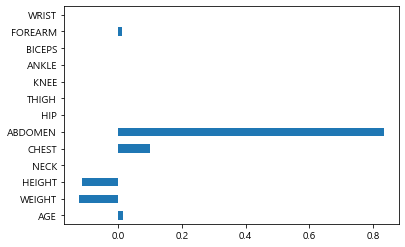

In [ ]:
lasso = Lasso(random_state = 1234, alpha = 1)
lasso.fit(df_train_x, df_train_y)
print(lasso.intercept_)

df_lasso_coef = pd.DataFrame({'Coef':lasso.coef_}, index = df_train_x.columns)
df_lasso_coef

df_lasso_coef.plot.barh(y = 'Coef', legend =False)

In [ ]:
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print('train data의 결정계수:', r2_score(df_train_y,train_pred))
print('test data의 결정계수:', r2_score(df_test_y,test_pred))

train data의 결정계수: 0.7448823019911712
test data의 결정계수: 0.6397843604404871


In [ ]:
train_pred = lasso.predict(df_train_x)
test_pred = lasso.predict(df_test_x)
print('train data의 결정계수:', r2_score(df_train_y,train_pred))
print('test data의 결정계수:', r2_score(df_test_y,test_pred))

train data의 결정계수: 0.7448823019911712
test data의 결정계수: 0.6397843604404871


-47.00875497399707


<AxesSubplot:>

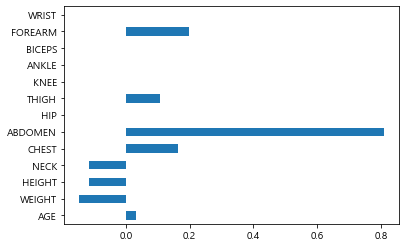

In [ ]:
elastic = ElasticNet(random_state = 1234, alpha = 1,l1_ratio= 0.5)
elastic.fit(df_train_x,df_train_y)

print(elastic.intercept_)

df_elastic_coef = pd.DataFrame({"Coef":elastic.coef_},index = df_train_x.columns)
df_elastic_coef

df_elastic_coef.plot.barh ( y = 'Coef', legend = False)

In [ ]:
train_pred = elastic.predict(df_train_x)
test_pred = elastic.predict(df_test_x)
print('train data의 결정계수:', r2_score(df_train_y,train_pred))
print('test data의 결정계수:', r2_score(df_test_y,test_pred))

train data의 결정계수: 0.7549442655494084
test data의 결정계수: 0.636671178295827
